## 1. Wczytanie danych

# Wczytanie danych i szybki podgląd.

In [2]:
# Import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych
file_path = 'C:\\Users\\shind\\Documents\\GitHub\\s26102-Air-Quality-And-Pollution\\data\\pollution_dataset.csv'
data = pd.read_csv(file_path)

# Podgląd pierwszych 5 rekordów
print(data.head())

# Podstawowe informacje o danych
print(data.info())


   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         27.2      51.7   35.1  46.2  26.7  32.2  0.98   
1         26.3      59.3    1.0   6.2  38.3  20.4  0.68   
2         27.9      73.2   20.0  39.4  19.6   5.8  0.95   
3         23.9      51.9   14.7  24.3   5.2  12.6  1.24   
4         25.2      59.0   26.3  30.9  26.8  13.5  1.06   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                           11.2                 314   Hazardous  
1                           13.5                 298        Good  
2                            5.4                 309        Good  
3                            4.5                 282        Poor  
4                            5.6                 293        Poor  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature

# 2. Rozkład zmiennych numerycznych

## Histogramy dla każdej zmiennej numerycznej.

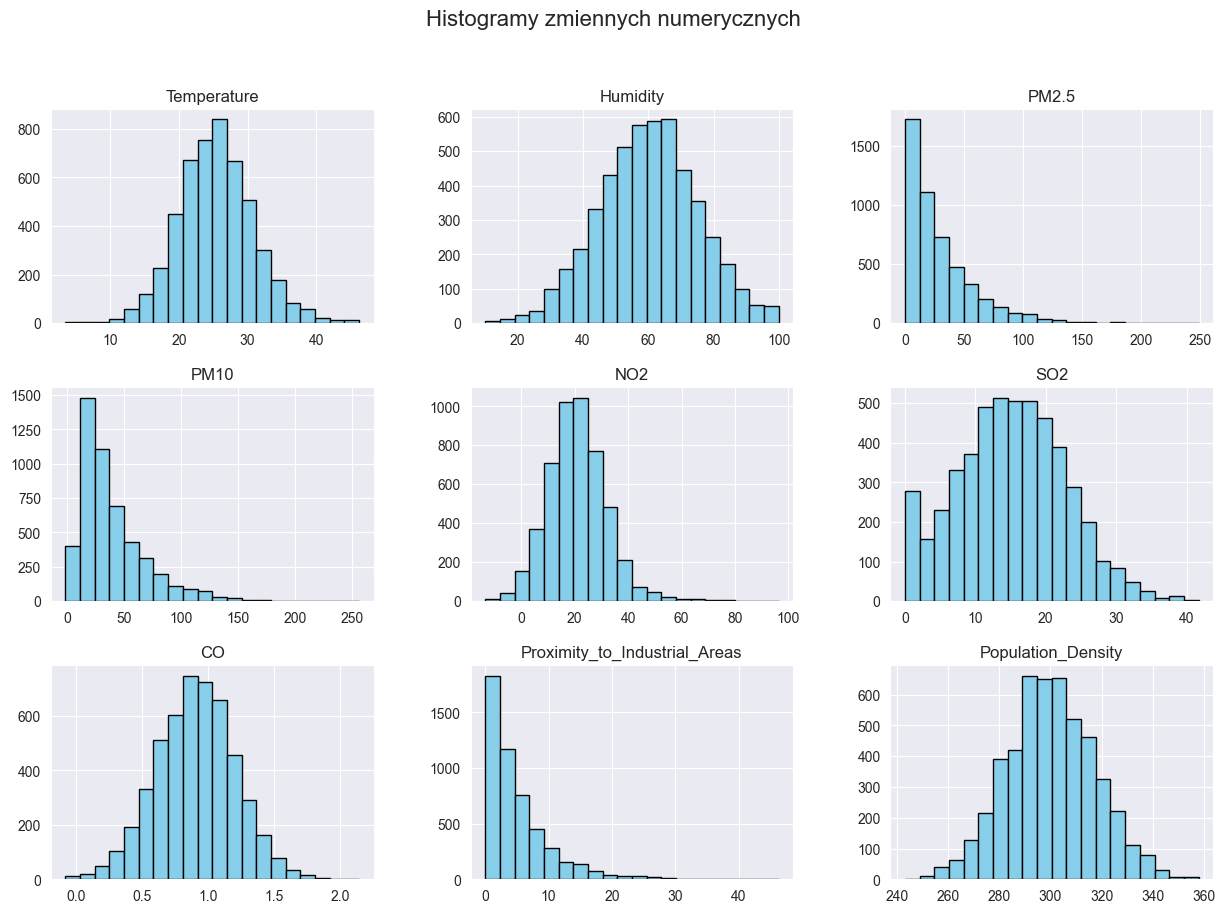

In [3]:
# Tworzenie histogramów
data.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogramy zmiennych numerycznych", fontsize=16)
plt.show()

# 3. Rozkład zmiennej kategorycznej (Air Quality)

C:\Users\shind\AppData\Local\Temp\ipykernel_50280\2593744741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Air Quality'], palette='Set2')


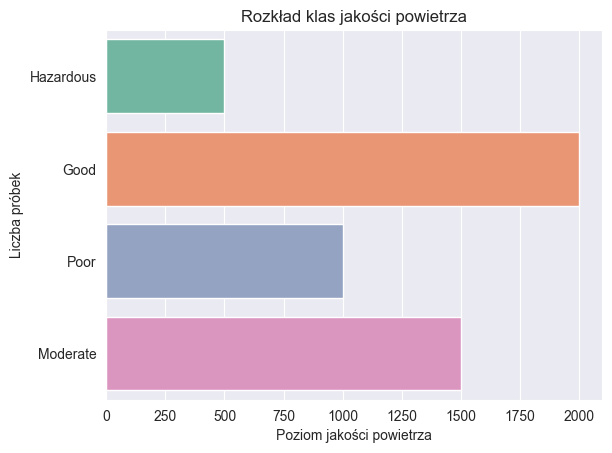

In [4]:
# Rozkład klas jakości powietrza
sns.countplot(data['Air Quality'], palette='Set2')
plt.title("Rozkład klas jakości powietrza")
plt.xlabel("Poziom jakości powietrza")
plt.ylabel("Liczba próbek")
plt.show()

# 4. Brakujące wartości

## Sprawdzenie brakujących wartości oraz ich wizualizacja.

Brakujące wartości w danych:
Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


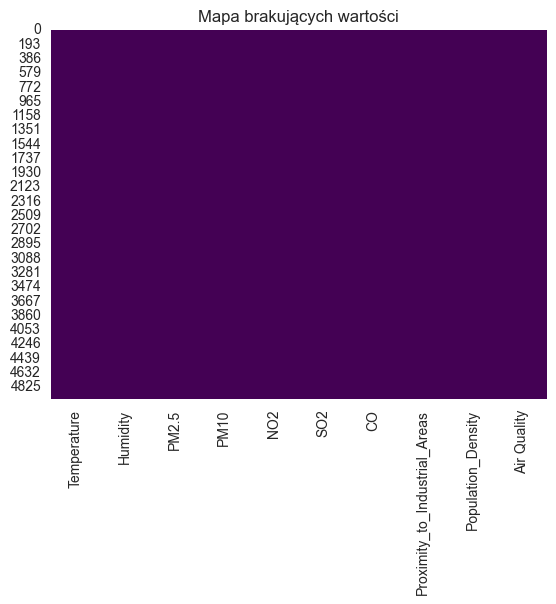

In [5]:
# Liczba brakujących wartości w danych
missing_values = data.isnull().sum()
print("Brakujące wartości w danych:")
print(missing_values)

# Wizualizacja brakujących wartości
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa brakujących wartości")
plt.show()

# 5. Wykresy pudełkowe

## Sprawdzenie wartości odstających w zmiennych numerycznych.

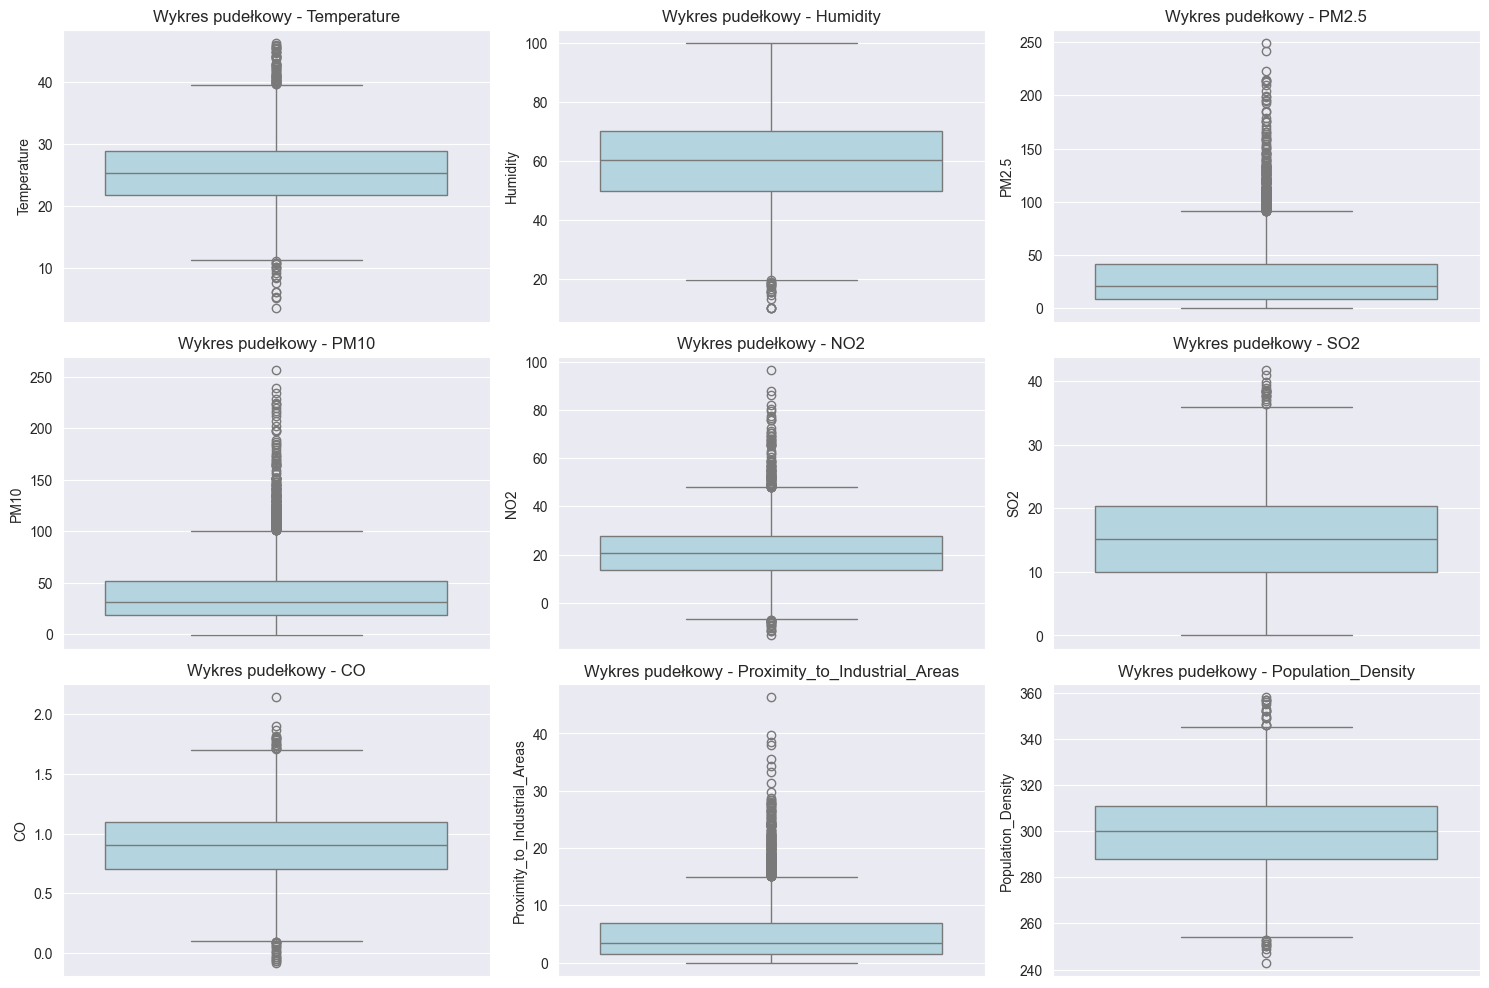

In [6]:
# Wykresy pudełkowe dla każdej zmiennej numerycznej
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.select_dtypes(include=np.number).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[column], color='lightblue')
    plt.title(f"Wykres pudełkowy - {column}")
plt.tight_layout()
plt.show()

# 6. Macierz korelacji

## Sprawdzenie zależności między zmiennymi numerycznymi.

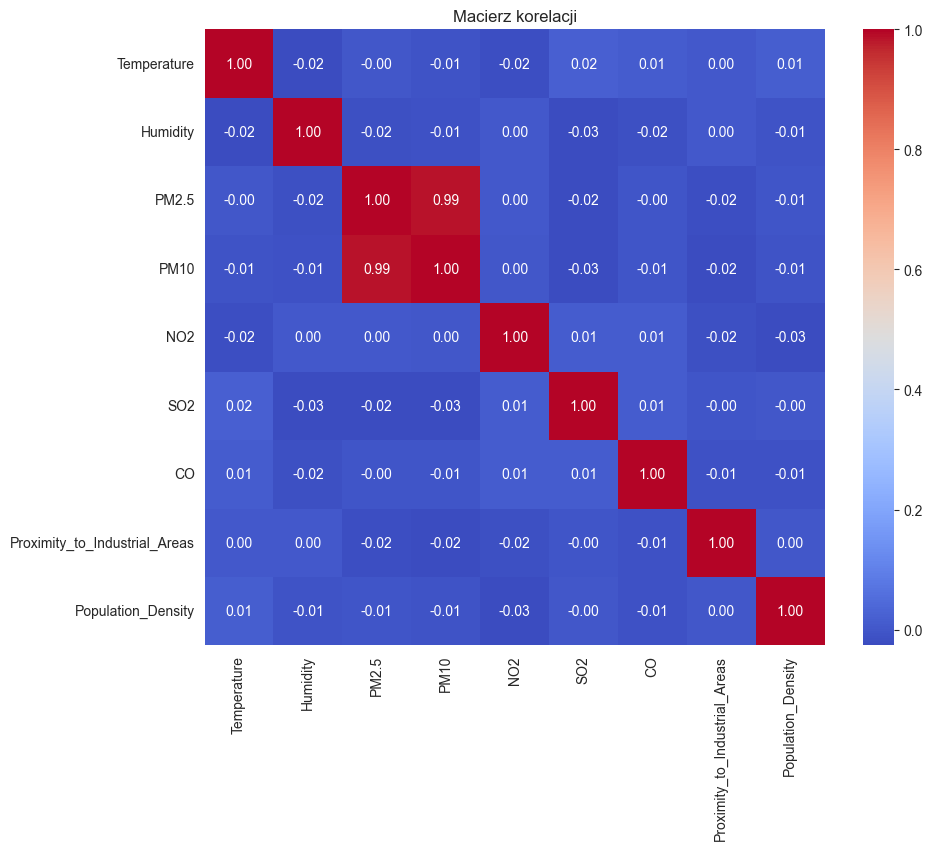

In [8]:
# Filtruj tylko zmienne numeryczne
numerical_data = data.select_dtypes(include=[np.number])

# Macierz korelacji
corr_matrix = numerical_data.corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Macierz korelacji")
plt.show()

## 7. Automatyczna analiza danych

In [13]:
from ydata_profiling import ProfileReport

# Generowanie raportu
profile = ProfileReport(data, title="Raport YData Profiling", explorative=True)

# Zapis raportu do pliku HTML
profile.to_file("ydata_profiling_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]